**Import libraries**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import joblib
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Load dataset**

In [ ]:
# Load the dataset into a DataFrame
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/earthquake_data.csv")

In [ ]:
data.head(1)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands


In [ ]:
data.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

**Data pre-processing**

In [ ]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

**Checking for Null Values**

In [ ]:
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

**Handling Missing values**

In [ ]:
data["alert"] = data["alert"].fillna("red")
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['title', 'date_time', 'net', 'magType', 'location', 'continent', 'country'])

In [ ]:
data

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,8,7,green,1,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,4,4,green,0,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,3,3,green,1,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,5,5,green,1,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,0,2,green,1,670,131,4.998,27.0,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,red,0,912,427,0.000,0.0,60.000,13.0490,-88.660
778,6.9,5,7,red,0,745,0,0.000,0.0,36.400,56.7744,-153.281
779,7.1,0,7,red,0,776,372,0.000,0.0,103.000,-14.9280,167.170
780,6.8,0,5,red,0,711,64,0.000,0.0,33.000,6.6310,126.899


In [ ]:
data.dtypes

magnitude    float64
cdi            int64
mmi            int64
alert         object
tsunami        int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
dtype: object

In [ ]:
# Perform label encoding on the 'alert' column
data['alert'] = pd.Categorical(data['alert'])
data['alert'] = data['alert'].cat.codes

# Convert the remaining columns to numeric format
numeric_columns = ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')



In [ ]:
data.corr()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
magnitude,1.000000,0.209549,0.285552,0.155730,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911
cdi,0.209549,1.000000,0.317937,0.027426,0.160266,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048
mmi,0.285552,0.317937,1.000000,0.402772,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803
alert,0.155730,0.027426,0.402772,1.000000,-0.526716,0.228977,0.555403,-0.455290,0.001144,-0.228411,0.184431,0.082313
tsunami,-0.004726,0.160266,-0.147363,-0.526716,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.056814,-0.113209,-0.136778
sig,0.515871,0.479788,0.442423,0.228977,-0.015500,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132
nst,0.113114,-0.175417,0.160417,0.555403,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665
dmin,-0.091403,0.006554,-0.299074,-0.455290,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875
gap,-0.110626,0.098143,-0.015723,0.001144,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623
depth,0.030644,-0.097891,-0.504439,-0.228411,0.056814,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'alert'}>,
        <Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

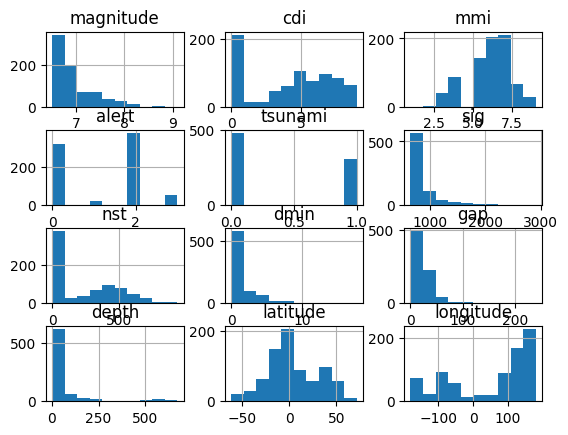

In [ ]:
data.hist()

In [ ]:
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

In [ ]:
# Creating visually differentiable values      v Diminishing the difference, to avoid vanishing points in map
data['power'] = pow(10, data['magnitude']) / pow(3, data['magnitude'])
data['power'] = data['power'].round(0)

fig = make_world_fig(data=data, lat='latitude', lon='longitude', hover_name='magnitude', size='power', cl_disc_seq=["red"], zoom=1.5, height=500)
fig.show()

In [ ]:
data['sig'] = data['sig'] ** 2 / 10_000 # Creating visually differentiable values according to sig
data['sig'] = data['sig'].round(0)

fig = make_world_fig(data, 'latitude', 'longitude', 'magnitude', 'sig', ["red"], 1.5, 500)
fig.show()

In [ ]:
tsun = data[data['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["orange"], 1.5, 500)
fig.show()

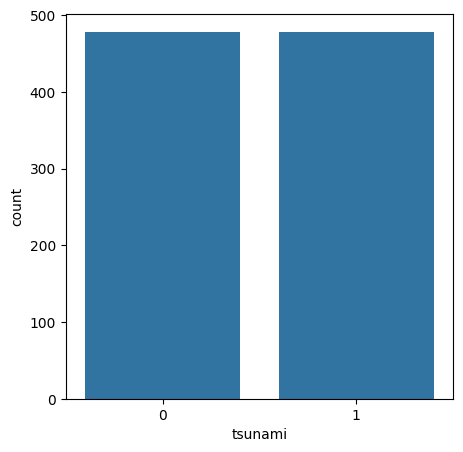

In [ ]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into two classes
class_0 = data[data['tsunami'] == 0]
class_1 = data[data['tsunami'] == 1]

# Resample the minority class (assuming class 1 is the minority class)
class_1_resampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Concatenate the resampled minority class with the majority class
balanced_data = pd.concat([class_0, class_1_resampled])

# Plot the balanced data
plt.figure(figsize=(5, 5))
sns.countplot(data=balanced_data, x='tsunami')
plt.show()


In [ ]:
X=data.drop('tsunami',axis=1)
y=data['tsunami']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(625, 12) (157, 12) (625,) (157,)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred=l1.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

80.2547770700637

In [ ]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(X_train,y_train)

SVC(kernel='linear', random_state=2)

In [ ]:
y_pred1=SVM.predict(X_test)
y_pred1

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

78.343949044586

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1])

In [ ]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

92.99363057324841

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create MLP model
mlp = MLPClassifier()

# Train the MLP model
mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_pred4=dt.predict(X_test)
y_pred4

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1])

In [ ]:
ac4 = accuracy_score(y_test, y_pred4)*100
ac4

92.99363057324841

In [ ]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'MLP']
accuracies = [ac, ac1, ac3, ac4]

evaluation_df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})
evaluation_df

,Model,Accuracy (%)
0,Logistic Regression,80.254777
1,SVM,78.343949
2,Decision Tree,92.993631
3,MLP,92.993631


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for each model
precision_lr = precision_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred1)
precision_dt = precision_score(y_test, y_pred3)
precision_mlp = precision_score(y_test, y_pred4)

recall_lr = recall_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred1)
recall_dt = recall_score(y_test, y_pred3)
recall_mlp = recall_score(y_test, y_pred4)

f1_lr = f1_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred1)
f1_dt = f1_score(y_test, y_pred3)
f1_mlp = f1_score(y_test, y_pred4)

# Create a DataFrame to store the evaluation metrics
evaluation_metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'MLP'],
    'Accuracy (%)': accuracies,
    'Precision': [precision_lr, precision_svm, precision_dt, precision_mlp],
    'Recall': [recall_lr, recall_svm, recall_dt, recall_mlp],
    'F1 Score': [f1_lr, f1_svm, f1_dt, f1_mlp]
})

# Display the evaluation metrics DataFrame
print(evaluation_metrics_df)

                 Model  Accuracy (%)  Precision    Recall  F1 Score
0  Logistic Regression     80.254777   0.727273  0.848485  0.783217
1                  SVM     78.343949   0.728571  0.772727  0.750000
2        Decision Tree     92.993631   0.910448  0.924242  0.917293
3                  MLP     92.993631   0.910448  0.924242  0.917293


In [ ]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test,
                              'Predicted (Logistic Regression)': y_pred,
                              'Predicted (SVM)': y_pred1,
                              'Predicted (Decision Tree)': y_pred3,
                              'Predicted (MLP)': y_pred4})

# Display the first few rows of the DataFrame
print(comparison_df.head())


     Actual  Predicted (Logistic Regression)  Predicted (SVM)  \
596       0                                0                0   
588       0                                0                0   
208       1                                1                1   
291       1                                1                1   
174       1                                1                1   

     Predicted (Decision Tree)  Predicted (MLP)  
596                          0                0  
588                          0                0  
208                          1                1  
291                          1                1  
174                          1                1  


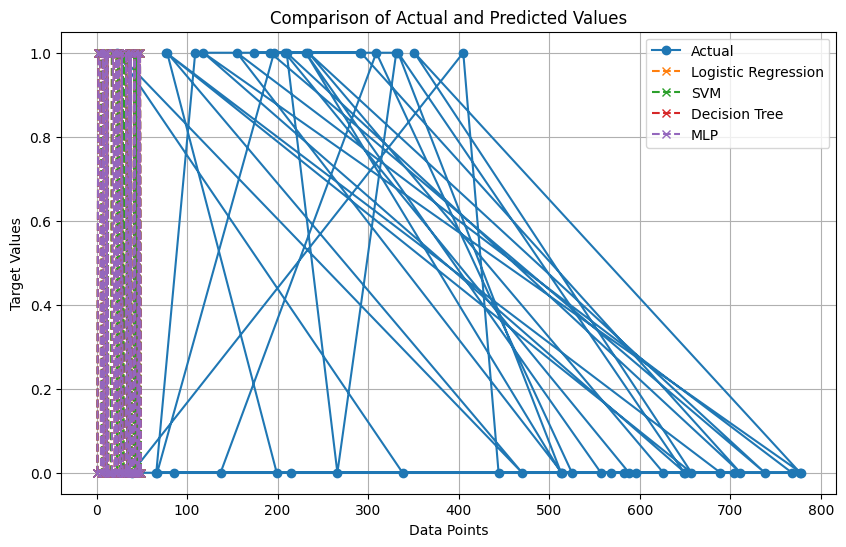

In [ ]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test[:50], label='Actual', marker='o')

# Plot predicted values for each model
plt.plot(y_pred[:50], label='Logistic Regression', linestyle='--', marker='x')
plt.plot(y_pred1[:50], label='SVM', linestyle='--', marker='x')
plt.plot(y_pred3[:50], label='Decision Tree', linestyle='--', marker='x')
plt.plot(y_pred4[:50], label='MLP', linestyle='--', marker='x')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

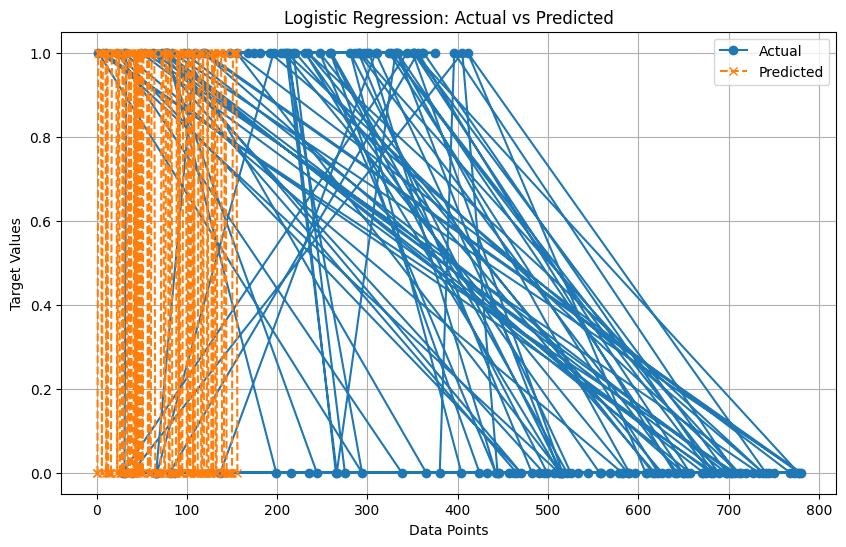

In [ ]:
# Create a figure for Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

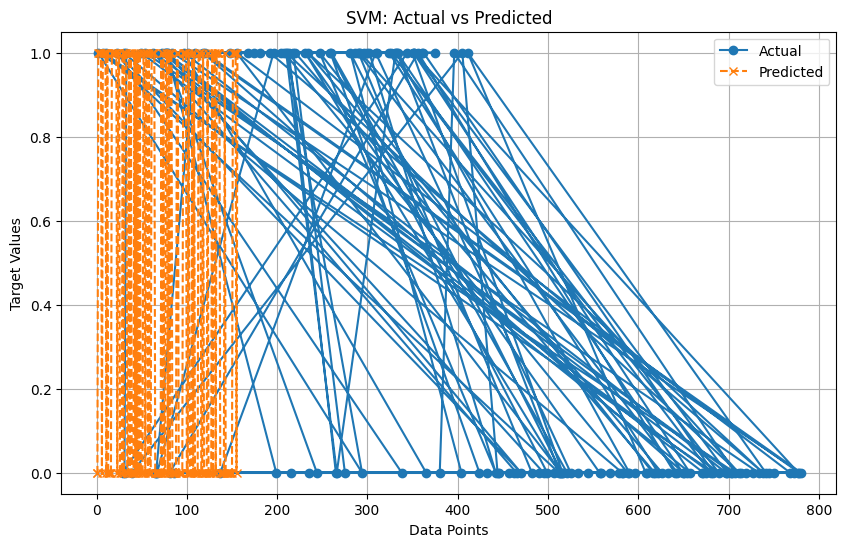

In [ ]:
# Create a figure for SVM
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred1, label='Predicted', linestyle='--', marker='x')
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

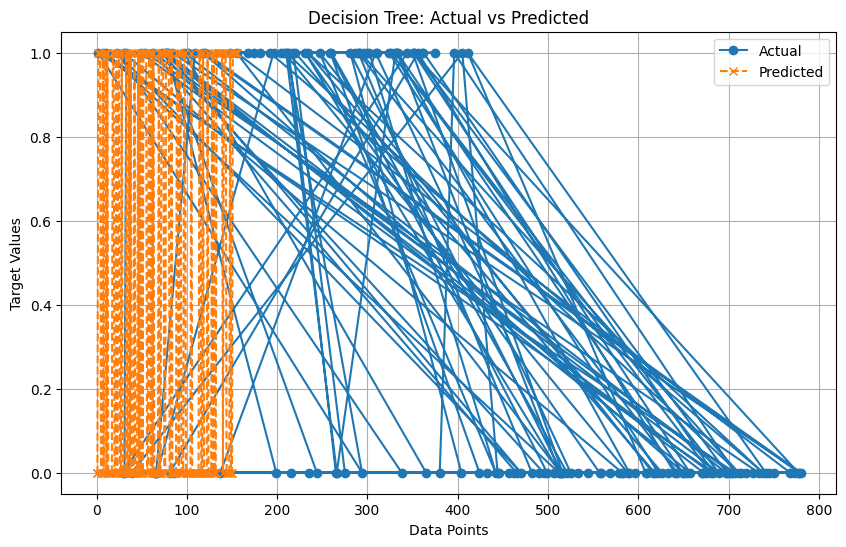

In [ ]:
# Create a figure for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred3, label='Predicted', linestyle='--', marker='x')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

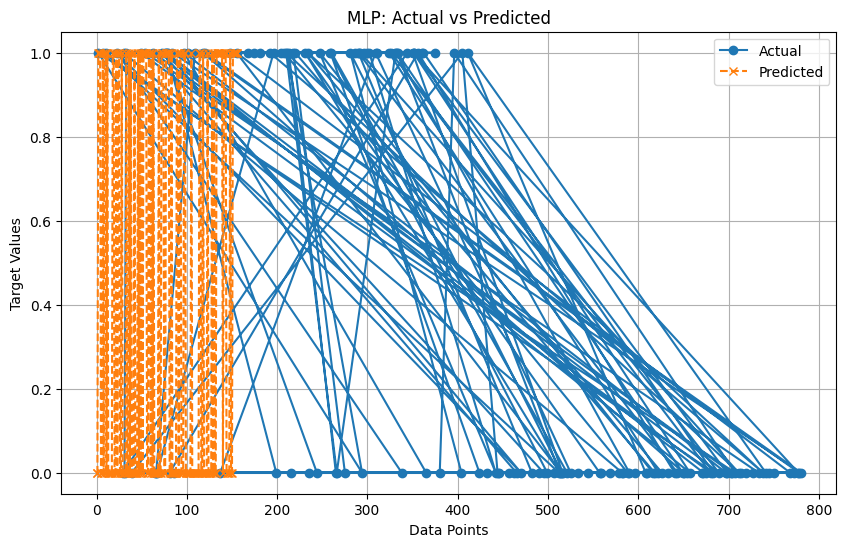

In [ ]:
# Create a figure for MLP
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred4, label='Predicted', linestyle='--', marker='x')
plt.title('MLP: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Dictionary to store model accuracies
model_accuracies = {}

# Loop through each trained model
for name, model in [('Logistic Regression', l1), ('SVM', SVM), ('Decision Tree', dt), ('MLP', mlp)]:
    # Make predictions on the test data
    if name == 'Logistic Regression':
        y_pred = l1.predict(X_test)
    elif name == 'SVM':
        y_pred = SVM.predict(X_test)
    elif name == 'Decision Tree':
        y_pred = dt.predict(X_test)
    elif name == 'MLP':
        y_pred = mlp.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store accuracy in the dictionary
    model_accuracies[name] = accuracy

# Display model accuracies
print("Model Accuracies:")
for name, accuracy in model_accuracies.items():
    print(f"{name}: {accuracy}")


Model Accuracies:
Logistic Regression: 0.802547770700637
SVM: 0.7834394904458599
Decision Tree: 0.9299363057324841
MLP: 0.5923566878980892


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the threshold for excluding models with low accuracy
threshold = 75  # Define your threshold here

# Filter out models with accuracy below the threshold
selected_models = [model for model, acc in model_accuracies.items() if acc >= threshold]

# If no models are selected based on the threshold, include all models
if not selected_models:
    selected_models = model_accuracies.keys()

# Initialize an empty list to store the selected estimators
estimators = []

# Define the selected estimators based on the selected models
if 'Logistic Regression' in selected_models:
    estimators.append(('lr', LogisticRegression()))
if 'SVM' in selected_models:
    estimators.append(('svm', SVC(kernel="linear", random_state=2)))
if 'Decision Tree' in selected_models:
    estimators.append(('dt', DecisionTreeClassifier()))
if 'MLP' in selected_models:
    estimators.append(('mlp', MLPClassifier()))

# Create the VotingClassifier with the selected estimators
voting_classifier = VotingClassifier(estimators=estimators)

# Fit the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions using the voting classifier model
voting_predictions = voting_classifier.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df_voting = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Voting Classifier)': voting_predictions
})

# Display the first few rows of the DataFrame
print(comparison_df_voting.head())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



     Actual  Predicted (Voting Classifier)
596       0                              0
588       0                              0
208       1                              1
291       1                              1
174       1                              1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, voting_predictions)
precision = precision_score(y_test, voting_predictions)
recall = recall_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions)

# Print evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8343949044585988
Precision: 0.9166666666666666
Recall: 0.6666666666666666
F1-score: 0.7719298245614035


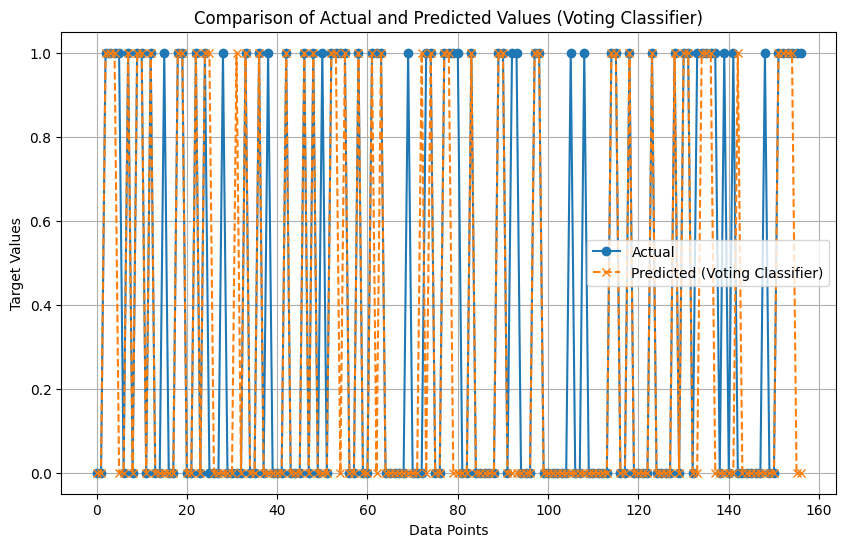

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot actual values
ax.plot(y_test.values, label='Actual', marker='o')

# Plot predicted values by the voting classifier
ax.plot(voting_predictions, label='Predicted (Voting Classifier)', linestyle='--', marker='x')

# Set plot title and labels
plt.title('Comparison of Actual and Predicted Values (Voting Classifier)')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)

# Show plot

In [ ]:
# Print the columns included in X before splitting
print("Columns included in X before splitting:")
print(X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X_train to confirm the number of samples and features
print("Shape of X_train:", X_train.shape)

# Now you can also print the columns included in X_train
print("Columns included in X_train:")
print(X_train.columns)


Columns included in X before splitting:
Index(['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'power'],
      dtype='object')
Shape of X_train: (625, 12)
Columns included in X_train:
Index(['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'power'],
      dtype='object')


In [ ]:
# Save models
joblib.dump(l1, 'logistic_regression_model_earthquake.pkl')
joblib.dump(SVM, 'svm_model_earthquake.pkl')
joblib.dump(dt, 'decision_tree_model_earthquake.pkl')
joblib.dump(mlp, 'mlp_model_earthquake.pkl')

['mlp_model_earthquake.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load models
loaded_lr_model = joblib.load('logistic_regression_model_earthquake.pkl')
loaded_svm_model = joblib.load('svm_model_earthquake.pkl')
loaded_dt_model = joblib.load('decision_tree_model_earthquake.pkl')
loaded_mlp_model = joblib.load('mlp_model_earthquake.pkl')

In [ ]:
import pandas as pd

# Define the features expected by the models
features = ['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'power']


# Take input data from the user
new_data = pd.DataFrame(columns=features)
for col in new_data.columns:
    new_data[col] = [float(input(f"Enter {col}: "))]


print(new_data)

Enter magnitude: 6
Enter cdi: 3
Enter mmi: 2
Enter alert: 5
Enter sig: 8
Enter nst: 7
Enter dmin: 1
Enter gap: 2
Enter depth: 3
Enter latitude: 5
Enter longitude: 5
Enter power: 5
   magnitude  cdi  mmi  alert  sig  nst  dmin  gap  depth  latitude  \
0        6.0  3.0  2.0    5.0  8.0  7.0   1.0  2.0    3.0       5.0   

   longitude  power  
0        5.0    5.0  


In [ ]:
# Make predictions on new data
lr_predictions = loaded_lr_model.predict(new_data)
svm_predictions = loaded_svm_model.predict(new_data)
dt_predictions = loaded_dt_model.predict(new_data)
mlp_predictions = loaded_mlp_model.predict(new_data)

In [ ]:

# Print predictions
print("Logistic Regression Predictions:", lr_predictions)
print("SVM Predictions:", svm_predictions)
print("Decision Tree Predictions:", dt_predictions)
print("MLP Predictions:", mlp_predictions)

Logistic Regression Predictions: [1]
SVM Predictions: [0]
Decision Tree Predictions: [1]
MLP Predictions: [0]


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the dataset into a DataFrame
file_path = "/earthquake_data.csv"
data = pd.read_csv("/content/drive/MyDrive/earthquake_data.csv")



In [ ]:

# Assuming 'latitude', 'longitude', 'magnitude', and 'power' columns exist in the CSV
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
                            hover_name=hover_name,
                            size=size,
                            color_discrete_sequence=cl_disc_seq,
                            zoom=zoom, height=height
                           )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]}
        ]
    )

    return fig


In [ ]:

# Creating visually differentiable values v Diminishing the difference, to avoid vanishing points in map
data['power'] = pow(10, data['magnitude']) / pow(3, data['magnitude'])
data['power'] = data['power'].round(0)

In [ ]:
fig = make_world_fig(data=data, lat='latitude', lon='longitude', hover_name='magnitude', size='power', cl_disc_seq=["red"], zoom=1.5, height=500)
fig.show()